# SMI CirAvg for multi-samples

 

### SMI OLOG

SMI Olog (https://logbook.nsls2.bnl.gov/12-ID/)

In [3]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from databroker import Broker
db = Broker.named('smi')

In [4]:
%run ~/pySMI/pySMI/smi_circular_average.py

In [5]:
%run ~/pySMI/pySMI/smi_generic_functions.py

## Define output data path

In [6]:
outDir0 = '/GPFS/xf12id1/analysis/2018_2/302596_Lee/Results/CT/'
ResDir = os.path.join( outDir0, 'PostAnalysis/' )# +'/%s/'%sam )
os.makedirs(ResDir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir)

Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_2/302596_Lee/Results/CT/PostAnalysis/


# Define Input data path

In [7]:
inDir = '/GPFS/xf12id1/analysis/2018_1/302596/Results/CT/'
print(inDir)

/GPFS/xf12id1/analysis/2018_1/302596/Results/CT/


In [24]:
#listdir(inDir)

In [33]:
sams = listdir( inDir )

In [34]:
bad_sams = [  'PostAnalysis',  ]

In [37]:
for sam in bad_sams:    
    try:
        sams.remove(sam) 
        print('The sam: %s is removed from the sams list.'%sam)
    except:
        pass


In [36]:
sams

['CT_ES_QA_E6-3_fastcast_X08.00_Y00.20_',
 'CT_ES_Br_E6-5_X22.00_Y000.20_',
 'CT_ES_Br_E6-3_capillary_X000.80_Y01.30_',
 'CT_ES_Br_E6-5_fastcast_X20.00_Y00.40_',
 'CT_ES_QA_E6-3_capillary_X11.10_Y00.50_',
 'CT_BSB6_capillary_X-70.70_Y00.50_',
 'CT_ES_Br_E6-5_fastcast_X20.00_Y01.60_',
 'CT_ES_QA_E6-3_X-11.00_Y000.40_',
 'CT_blank_capillary_X-110.50_Y01.30_',
 'CT_ESE6_capillary_X-40.40_Y00.50_',
 'CT_ES_QA_E6-4_edge_X-60.75_Y01.20_',
 'CT_ESE6_X-1.00_Y02.20_',
 'CT_BSB6_X-11.00_Y01.60_',
 'CT_Blank_Kapton_hole_X-10.00_Y02.20_',
 'CT_ES_Br_E6-3_X07.00_Y01.60_',
 'CT_ES_QA_E6-5_fastcast_X21.00_Y01.90_',
 'CT_ES_Br_E6-5_capillary_X07.60_Y00.50_',
 'CT_ES_Br_E6-5_X22.00_Y01.00_',
 'CT_ES_QA_E6-5_edge_X000.54_Y01.20_',
 'CT_ES_QA_E6-4_X-5.00_Y01.40_',
 'CT_ES_Br_E6-3_fastcast_X00.00_Y01.60_',
 'CT_ES_QA_E6-3_edge_X-130.15_Y00.80_',
 'CT_ES_QA_E6-5_capillary_X19.40_Y00.50_',
 'CT_BSB6_capillary_X-70.70_Y01.30_',
 'CT_ES_Br_E6-5_X22.00_Y00.40_',
 'CT_ES_Br_E6-5_fastcast_X20.00_Y000.20_',
 'CT_

## Start running CirAvg here

In [39]:
inDir

'/GPFS/xf12id1/analysis/2018_1/302596/Results/CT/'

<IPython.core.display.Javascript object>


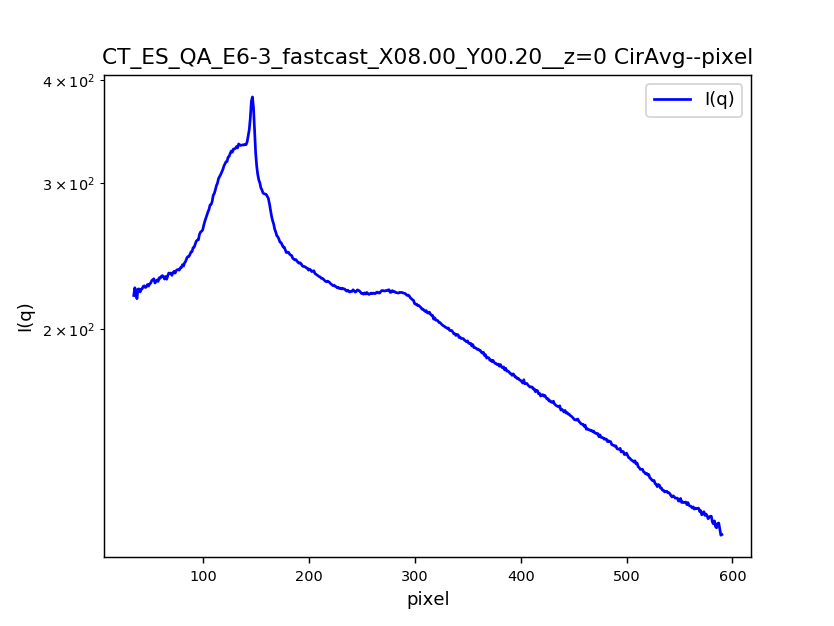

<IPython.core.display.Javascript object>


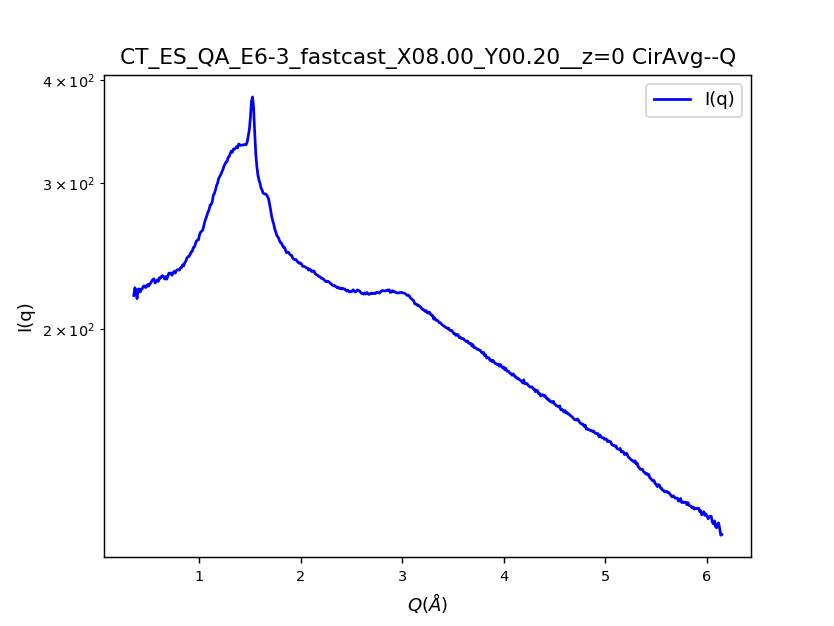

In [46]:
for sam in sams:
    #get Qmap first   
    inDir = '/GPFS/xf12id1/analysis/2018_1/302596/Results/CT/%s/'%sam
    pos_=1
    qmap_fp = '%sQmap_pos=%s.tif'%(sam,pos_)
    qx_fp =  '%sQmap_qr_cor_pos=%s.txt'%(sam,pos_)
    qz_fp =  '%sQmap_qz_cor_pos=%s.txt'%(sam,pos_)    
    xs = np.loadtxt(  inDir + qx_fp   )
    zs = np.loadtxt(  inDir + qz_fp   )
    #qs = np.sqrt(xs**2 + zs**2 )
    qmap = np.array(  PIL.Image.open(  inDir + qmap_fp   ).convert('I') )
    #make mask for this qmap
    mask = np.ones_like(qmap, dtype=bool)
    mask[:,:5] = 0 #left edge
    mask[:,-5:] = 0 #right edge
    mask[:5,:] = 0 #upper edge
    mask[-5:,:] = 0 #lower edge
    mask.ravel()[np.where(qmap.ravel()==0)] = 0
    mask[:86,:] = 0
    #ring_mask = create_ring_mask(  mask.shape, qmap.shape[1]-5,  center=[0, 79]  )
    ring_mask= np.ones_like(mask)
    mask *= ring_mask
    #define setup paras
    uid = sam
    setup_pargs =  {'Ldet': 1, #in mm 
         'center': [79,0],
         'dpix': 0.172,  
         'lambda_': 12.39842/16.1,
         'path': ResDir,
         'uid': sam,
        }
    
    pos= [ 1  ] 
    fig, ax  = plt.subplots()
    for i, pos_ in enumerate(pos):
        qmap_fp = '%sQmap_pos=%s.tif'%(sam,pos_)
        qx_fp =  '%sQmap_qr_cor_pos=%s.txt'%(sam,pos_)
        qz_fp =  '%sQmap_qz_cor_pos=%s.txt'%(sam,pos_)    
        xs = np.loadtxt(  inDir + qx_fp   )
        zs = np.loadtxt(  inDir + qz_fp   )
        #qs = np.sqrt(xs**2 + zs**2 )
        qmap = np.array(  PIL.Image.open(  inDir + qmap_fp   ).convert('I') )
        qp_saxs, iq_saxs, q_saxs = get_circular_average( qmap*mask , mask, pargs=setup_pargs  )
        #qp_saxs_, iq_saxs_, q_saxs_ = get_circular_average( qs*mask , mask, pargs=setup_pargs  )    
        y = iq_saxs  + (i*50)
        plot1D( x=qp_saxs, y=y, ax=ax,  logy= True, m= '', c= colors[i], legend='I(q)'  )    
        #plot1D( x= range(len(xs)) ,y= qmap[ 79   ], c= 'r', m='',ax=ax )

        xvs, zvs = np.meshgrid(xs, zs)  
        valmap = np.hypot(xvs,zvs)
        qp_val, iq_val, q_val = get_circular_average( valmap*mask , mask, pargs=setup_pargs  )

        ##The sample to detector distance is not perfectly calabrated, we found a 0.98 factor should be applied. 6/23/2018 
        iq_val /=0.98
        ############################
        save_lists(  [qp_saxs, iq_saxs, iq_val], label=['q_pixel', 'Iq', 'q_A-1'], 
                   filename='%s_pix_Iq_q.csv'%uid, path= ResDir  ) 
        #plot1D( x= xs ,y= qmap[ 79   ], c= 'b', m='',ax=ax, logy=True )
        #plot1D( x= qp_saxs, y=y, ax=ax,  logy= True, m='',)
        #ax.vlines( report_dx*0.99, ymin = ymin,  ymax=report_dy * 300,  color='b'  )

    ax.set_xlabel('pixel')  
    ax.set_ylabel('I(q)')
    ax.set_title('%s_z=0 CirAvg--pixel'%sam)
    fig.savefig( ResDir + 'Sq_pixel_%spos=%s.png'%(sam, pos_) )
    #ax.set_xlim(   [100, 600 ] )  
    #ax.set_ylim(  [-10,25000]  )     

    fig, ax  = plt.subplots()
    plot1D( x= iq_val, y= iq_saxs, ax=ax,  logy= True, m= '', c= colors[i], legend='I(q)'  )
    ax.set_xlabel(r'$Q (\AA)$')  
    ax.set_ylabel('I(q)')
    ax.set_title('%s_z=0 CirAvg--Q'%sam)
    fig.savefig( ResDir + 'Sq_Q_%spos=%s.png'%(sam, pos_) )
